<a href="https://colab.research.google.com/github/amitgupta005/regression_project/blob/main/Copy_of_iimb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/Task_Akshita - Sheet1.csv")

In [ ]:
# rename the coverage column
df_new = df.rename(columns={'Per HH with Tap Connection (Coverage)': 'coverage'})

# **(a) Heterogenity**

Heterogenity in simple terms refers to the dissimilarities in the data or non uniformity in the data.

In [ ]:
# Calculate mean
mean_value = df_new['coverage'].mean()

# Calculate median
median_value = df_new['coverage'].median()

# Calculate standard deviation
std_dev_value = df_new['coverage'].std()

# Print the results
print(f"Mean: {mean_value}\nMedian: {median_value}\nStandard Deviation: {std_dev_value}")


Mean: 70.7909375
Median: 73.21
Standard Deviation: 17.770358131590932


In [ ]:
# Calculate the coefficient of variation
coeff_var = std_dev_value/mean_value
print(f"The coefficient of variation is : {coeff_var}")

The coefficient of variation is : 0.25102589058932767


Here I have used standard deviation and coeffiecient of variation as the measure of heterogenity in coverage column of dataset. The mean coverage is 70.79 per household and the standard deviation is 17.77 which shows that the data is dispersed about the mean on average value of 17.77. The coefficent of variation is 25.10 % which is indicating the **low** variability in the column

# **(b) Inequality**

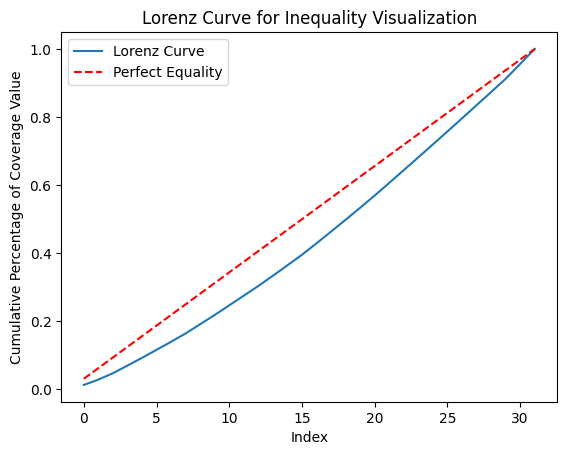

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Sort the data
sorted_data = sorted(df_new['coverage'])

# Plotting a Lorenz curve
cumulative_percentage = [sum(sorted_data[:i+1])/sum(sorted_data) for i in range(len(sorted_data))]
perfect_equality_line = [i/len(sorted_data) for i in range(1, len(sorted_data)+1)]

plt.plot(cumulative_percentage, label='Lorenz Curve')
plt.plot(perfect_equality_line, linestyle='--', color='red', label='Perfect Equality')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage of Coverage Value')
plt.title('Lorenz Curve for Inequality Visualization')
plt.legend()
plt.show()


In [ ]:
# Calculate the area under the Lorenz curve
area_lorenz_curve = np.trapz(cumulative_percentage, x=np.linspace(0, 1, len(sorted_data)))

# Calculate the area under the perfect equality line
area_perfect_equality = 0.5

# Calculate the Gini coefficient
gini_coefficient = (area_perfect_equality - area_lorenz_curve) / area_perfect_equality
print(area_lorenz_curve)
print(f'Gini Coefficient: {gini_coefficient}')

0.44428413343982964
Gini Coefficient: 0.11143173312034071


From the lorenz curve, we can see that there is a small deviation in the coverage line (cummulative percentage) from the line of equality. However, the gini coerfficient is 0.11 which indicates low inequality in the coverage.
(Gini coefficient ranges forom 0 to 1.)

# **(c) Consistency**

In [ ]:
df_new['coverage'].isnull().sum()

0

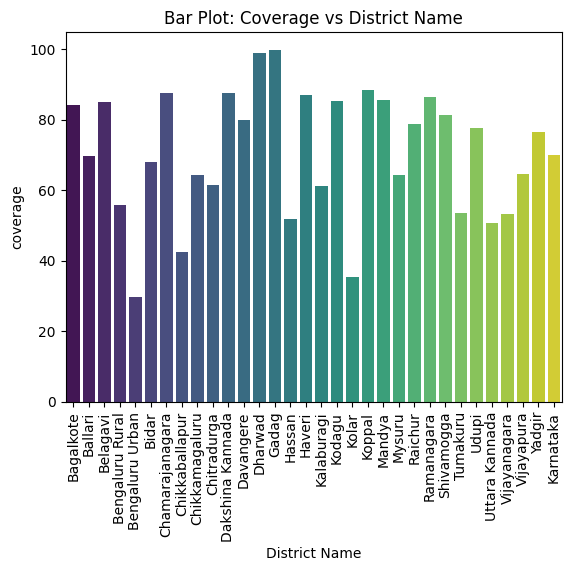

In [ ]:
# Draw a bar plot using Seaborn
sns.barplot(x='District Name', y='coverage', data=df_new, palette='viridis')
plt.title('Bar Plot: Coverage vs District Name')
plt.xticks(rotation=90)
plt.show()

Since the data for coverage details does not contains any null values and the barplot between the different districts and coverage value shows that the data does not show any trend and consistency. Thus, we can interpret that the data is not consistent.

**Conclusion** : Checking for heterogenity, inequlaity and consistency is a good technique to determine the quality of a dataset and improving the interpretability of the data.

# **Spatial Heterogeneity**

Spatial heterogeneity of dataset means that the values of a variable or a set of variables are not the same across all locations or regions in a geographic space.

Given dataset contains information about the tap coverage of all the 31 districts in Karnataka.

For this we need to know the geographical features (latitude and longitude) of each of the districts of karnataka.

In [ ]:
data = pd.read_csv("/content/Task_Akshita - Sheet2.csv")
data.head()

,District Name,latitude,longitude,Per HH with Tap Connection (Coverage)
0,Bagalkote,16.18,75.70,84.14
1,Ballari,15.15,76.92,69.66
2,Belagavi,15.85,74.50,84.92
3,Bengaluru Rural,13.20,77.70,55.77
4,Bengaluru Urban,12.97,77.59,29.77


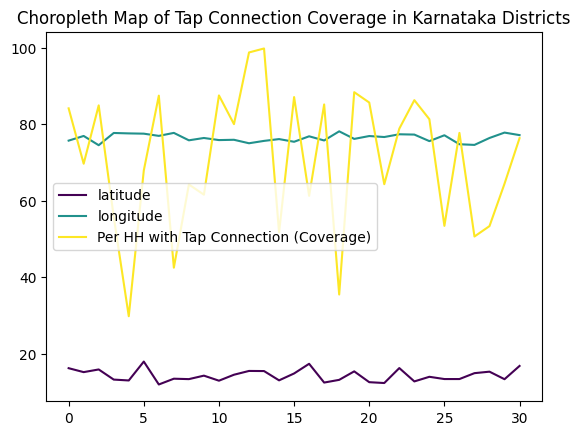

In [ ]:
data.plot(column='Per HH with Tap Connection (Coverage)', cmap='viridis', legend=True)
plt.title('Choropleth Map of Tap Connection Coverage in Karnataka Districts')
plt.show()

Spatial heterogeneity in the context of this map refers to the variation in the percentage of households with tap connections across different districts in Karnataka.
WE can see that there is no such correlation in the spatial features and household tap coverage. Hence there is large spatial heterogenity.